In [100]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
train_set = pd.read_csv('adult.data', header = None)

test_set = pd.read_csv('adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
url='./adult.data'
#columns name according to adult.names
cols=["age","workclass","fnlwgt","education","education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","wage_class"]

train_set=pd.read_csv(url, names=cols)   # reading and setting names

train_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set = pd.read_csv('./adult.test',skiprows = 1, header = None, names=cols)   #coz row one is multi index 

test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### EDA

In [4]:
train_set.isnull().sum()
# No null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

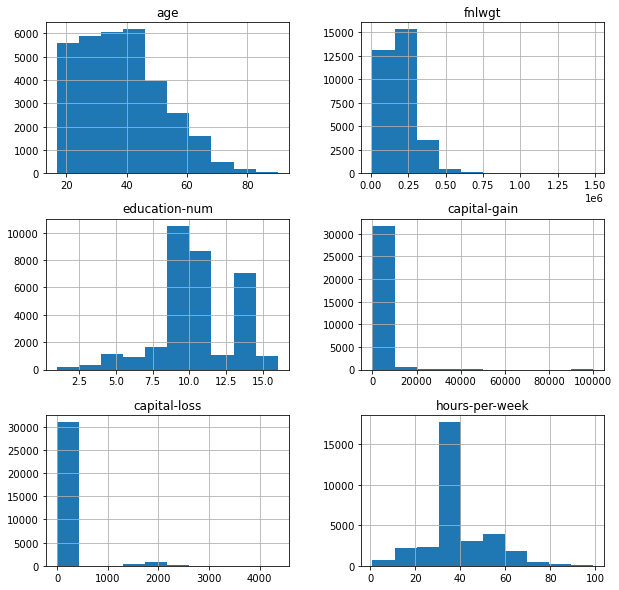

In [5]:
train_set.hist(figsize=(10,10))
plt.show()

In [6]:
train_set.dtypes  
#only 6 features(out of 14 are numeric)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage_class        object
dtype: object

#### checking uniqe values and count of them in each columns having type as object


In [7]:
train_set.workclass.value_counts()

# there is a '?'  need to be handle

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [11]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital-status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

###### Observation : features Native_counrty, Occupation, workclass having '?' as one value need to be handle

In [12]:
train_set.columns  

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage_class'],
      dtype='object')

In [13]:
import re
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)  

In [17]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [21]:
filter1 = train_set["workclass"]=="?"

index = train_set[train_set["native_country"]== ' ?'].index

#index.value_counts()  # to display all the indexes having value '?'
index.value_counts().sum()  # sum of those indexes 
# type(index)

583

In [23]:
#now apply the filter for the '?' value in those above 3 columns

indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


##### Observation: Max % of having ? is 5.66 we can drop and can check how much it is affedting our data

In [24]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [25]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(index)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....
Total New rows: 31978


In [27]:
print('\n Drowping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` featutre....
Total New rows: 31978


In [28]:
print('\n Drowping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [29]:
# check for '?' again
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


##### Applying one hot coding to all the categorical variables

In [30]:
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [34]:
df1.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [35]:
df2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Concatinating the two frames

In [36]:
X_train = pd.concat([df1, df2], axis=1)

In [37]:
X_train.shape   # final dataframe to be get Trained 

(30162, 104)

In [39]:
X_train

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,27,257302,12,0,0,38
32557,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,40,154374,9,0,0,40
32558,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,58,151910,9,0,0,40
32559,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,22,201490,9,0,0,20


In [41]:
y=train_set['wage_class']

In [42]:
# Applying label encoder on target column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [43]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

#### Since Training Dataset is cleaned and prepared, we will have repeat the same sets for cleaning and preapring test dataset. To save time, I will resume working with Training dataset to demonstrate the model

In [80]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(X_train,y_train, test_size=0.25,random_state=0)

In [60]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7, 9, 11, 15, 16 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators"     : [10,50,100,200]
    
}


In [61]:
classifier=XGBClassifier()

In [62]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [63]:
random_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, r

In [71]:
random_search.best_params_

{'n_estimators': 50,
 'min_child_weight': 5,
 'max_depth': 4,
 'learning_rate': 0.25,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [75]:
new_model= XGBClassifier(n_estimators= 50,
 min_child_weight= 5,
 max_depth= 4,
 learning_rate= 0.25,
 gamma= 0.4,
 colsample_bytree= 0.3)

In [76]:
new_model.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [77]:
ypred=new_model.predict(xtest)

In [78]:
new_model.score(xtrain,ytrain)

0.8735688077450157

In [79]:
new_model.score(xtest,ytest)

0.8628829067762896

In [81]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5639
           1       0.79      0.62      0.70      1902

    accuracy                           0.86      7541
   macro avg       0.84      0.78      0.80      7541
weighted avg       0.86      0.86      0.86      7541



In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

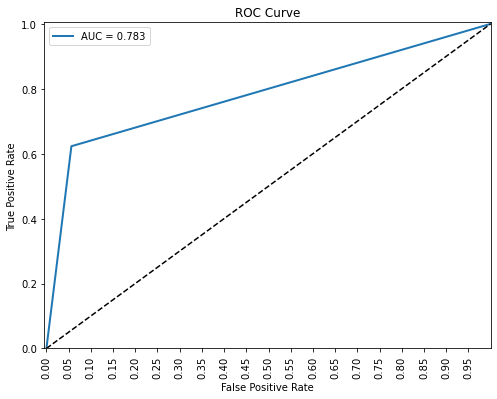

In [91]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

auc_rf=roc_auc_score(ytest,ypred)
fpr,tpr,threshold=roc_curve(ytest,ypred)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_rf)

#### Features Importance

In [92]:
features_tuple=list(zip(xtrain.columns,new_model.feature_importances_))

In [93]:
features_tuple

[('workclass_ Federal-gov', 0.010087398),
 ('workclass_ Local-gov', 0.005578171),
 ('workclass_ Private', 0.0030615968),
 ('workclass_ Self-emp-inc', 0.010588236),
 ('workclass_ Self-emp-not-inc', 0.0054042237),
 ('workclass_ State-gov', 0.0),
 ('workclass_ Without-pay', 0.0),
 ('education_ 10th', 0.0),
 ('education_ 11th', 0.0),
 ('education_ 12th', 0.0),
 ('education_ 1st-4th', 0.0),
 ('education_ 5th-6th', 0.0033396056),
 ('education_ 7th-8th', 0.0),
 ('education_ 9th', 0.0),
 ('education_ Assoc-acdm', 0.0),
 ('education_ Assoc-voc', 0.00096465804),
 ('education_ Bachelors', 0.027977468),
 ('education_ Doctorate', 0.025125595),
 ('education_ HS-grad', 0.0029800758),
 ('education_ Masters', 0.015058664),
 ('education_ Preschool', 0.0),
 ('education_ Prof-school', 0.006860911),
 ('education_ Some-college', 0.0012106933),
 ('marital_status_ Divorced', 0.10284972),
 ('marital_status_ Married-AF-spouse', 0.0),
 ('marital_status_ Married-civ-spouse', 0.14510737),
 ('marital_status_ Marrie

In [94]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [95]:
feature_imp

,Feature Names,Importance
0,workclass_ Federal-gov,0.010087
1,workclass_ Local-gov,0.005578
2,workclass_ Private,0.003062
3,workclass_ Self-emp-inc,0.010588
4,workclass_ Self-emp-not-inc,0.005404
...,...,...
99,fnlwgt,0.002188
100,education_num,0.044247
101,capital_gain,0.044568
102,capital_loss,0.017600


In [96]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)
feature_imp

,Feature Names,Importance
27,marital_status_ Never-married,0.183221
25,marital_status_ Married-civ-spouse,0.145107
23,marital_status_ Divorced,0.102850
101,capital_gain,0.044568
100,education_num,0.044247
...,...,...
72,native_country_ Honduras,0.000000
73,native_country_ Hong,0.000000
74,native_country_ Hungary,0.000000
75,native_country_ India,0.000000


Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

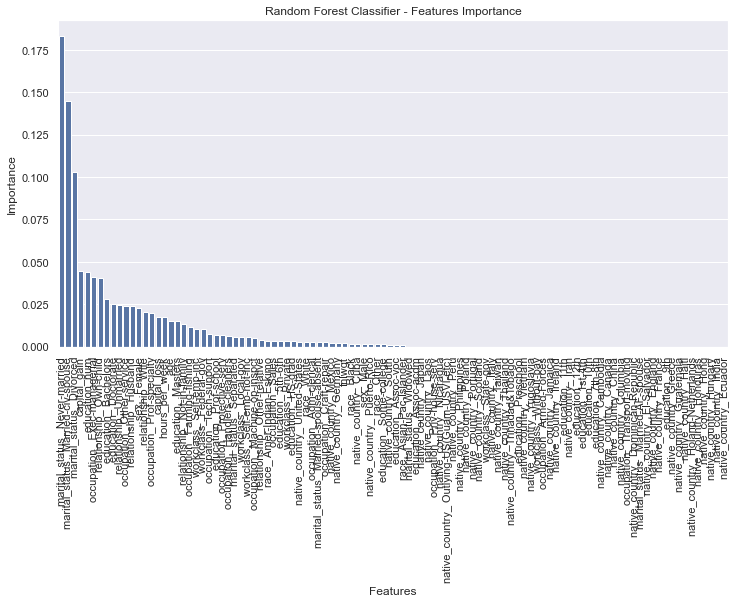

In [99]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

#### Model is best fitting with really good Training and Testing score